In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Ensure chessimg2pos is importable whether installed via pip or run from a cloned repo
try:
    import chessimg2pos  # noqa: F401
except ImportError:
    import sys, os

    # Notebook is inside examples/ — src is one level up
    sys.path.insert(0, os.path.abspath("../src"))

# Simple usage to predict FEN from Chess Image

In [3]:
from chessimg2pos import predict_fen

In [4]:
img_path = "../images/chess_image.png"  # REPLACE WITH THE PATH OF YOUR TEST IMAGE

fen = predict_fen(img_path)

In [5]:
print(fen)

11111111/11111111/11111111/1111p1K1/11k1P111/11111111/11111111/11111111


In [6]:
predict_fen(img_path, output_type="complex")

{'fen': '11111111/11111111/11111111/1111p1K1/11k1P111/11111111/11111111/11111111',
 'confidence': 0.16390336044566112,
 'predictions': [('a8', '1', 0.9721766710281372),
  ('b8', '1', 0.9720058441162109),
  ('c8', '1', 0.9730274677276611),
  ('d8', '1', 0.9720058441162109),
  ('e8', '1', 0.9730274677276611),
  ('f8', '1', 0.9720058441162109),
  ('g8', '1', 0.9730274677276611),
  ('h8', '1', 0.972175657749176),
  ('a7', '1', 0.9713500142097473),
  ('b7', '1', 0.9730575084686279),
  ('c7', '1', 0.9721204042434692),
  ('d7', '1', 0.9730575084686279),
  ('e7', '1', 0.9721204042434692),
  ('f7', '1', 0.9730575084686279),
  ('g7', '1', 0.9721204042434692),
  ('h7', '1', 0.9730713963508606),
  ('a6', '1', 0.9723353385925293),
  ('b6', '1', 0.9721204042434692),
  ('c6', '1', 0.9730575084686279),
  ('d6', '1', 0.9721204042434692),
  ('e6', '1', 0.9730575084686279),
  ('f6', '1', 0.9721204042434692),
  ('g6', '1', 0.9730575084686279),
  ('h6', '1', 0.9722870588302612),
  ('a5', '1', 0.97144937515

# Training from your own set of Images
- Insert all your images in a folder, each image named with its fen (replace '/' with '-')
- e.g 1bk1bNQp-bbPQq1br-nbQrk11k-1qkbkBKN-KbBKRNPR-PbKbB1pk-rNBB1pKQ-bPNQbbrb.png

In [7]:
from chessimg2pos import ChessRecognitionTrainer

In [8]:
trainer = ChessRecognitionTrainer(
    images_dir="../../training_images/chessboards",  # replace with your path
    model_path="../../models/test_model.pt",  # replace with path where you want models tgo be saved
    generate_tiles=False,  # Set to True if tiles need to be generated from boards
    epochs=2,
    overwrite=False,
    board_level_split=True,
)
model, device, accuracy = trainer.train(
    classifier="enhanced",
)

2026-02-27 12:03:30,587 - INFO - Board-level split: 551 train boards / 237 test boards
2026-02-27 12:03:30,593 - INFO - Model architecture:
EnhancedChessPieceClassifier(
  (conv_layers): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 

In [9]:
from chessimg2pos import ChessPositionPredictor

predictor = ChessPositionPredictor("../../models/test_model.pt", classifier="enhanced")
result = predictor.predict_chessboard("../images/chess_image.png", return_tiles=True)

In [10]:
print("Predicted FEN:", result["fen"])
print("Confidence:", result["confidence"])

Predicted FEN: 11111111/11111111/11111111/1111p1K1/11k1P111/11111111/11111111/11111111
Confidence: 0.16129446579909576


2026-02-27 12:04:10,542 - INFO - Lichess editor: https://lichess.org/editor/11111111/11111111/11111111/1111p1K1/11k1P111/11111111/11111111/11111111


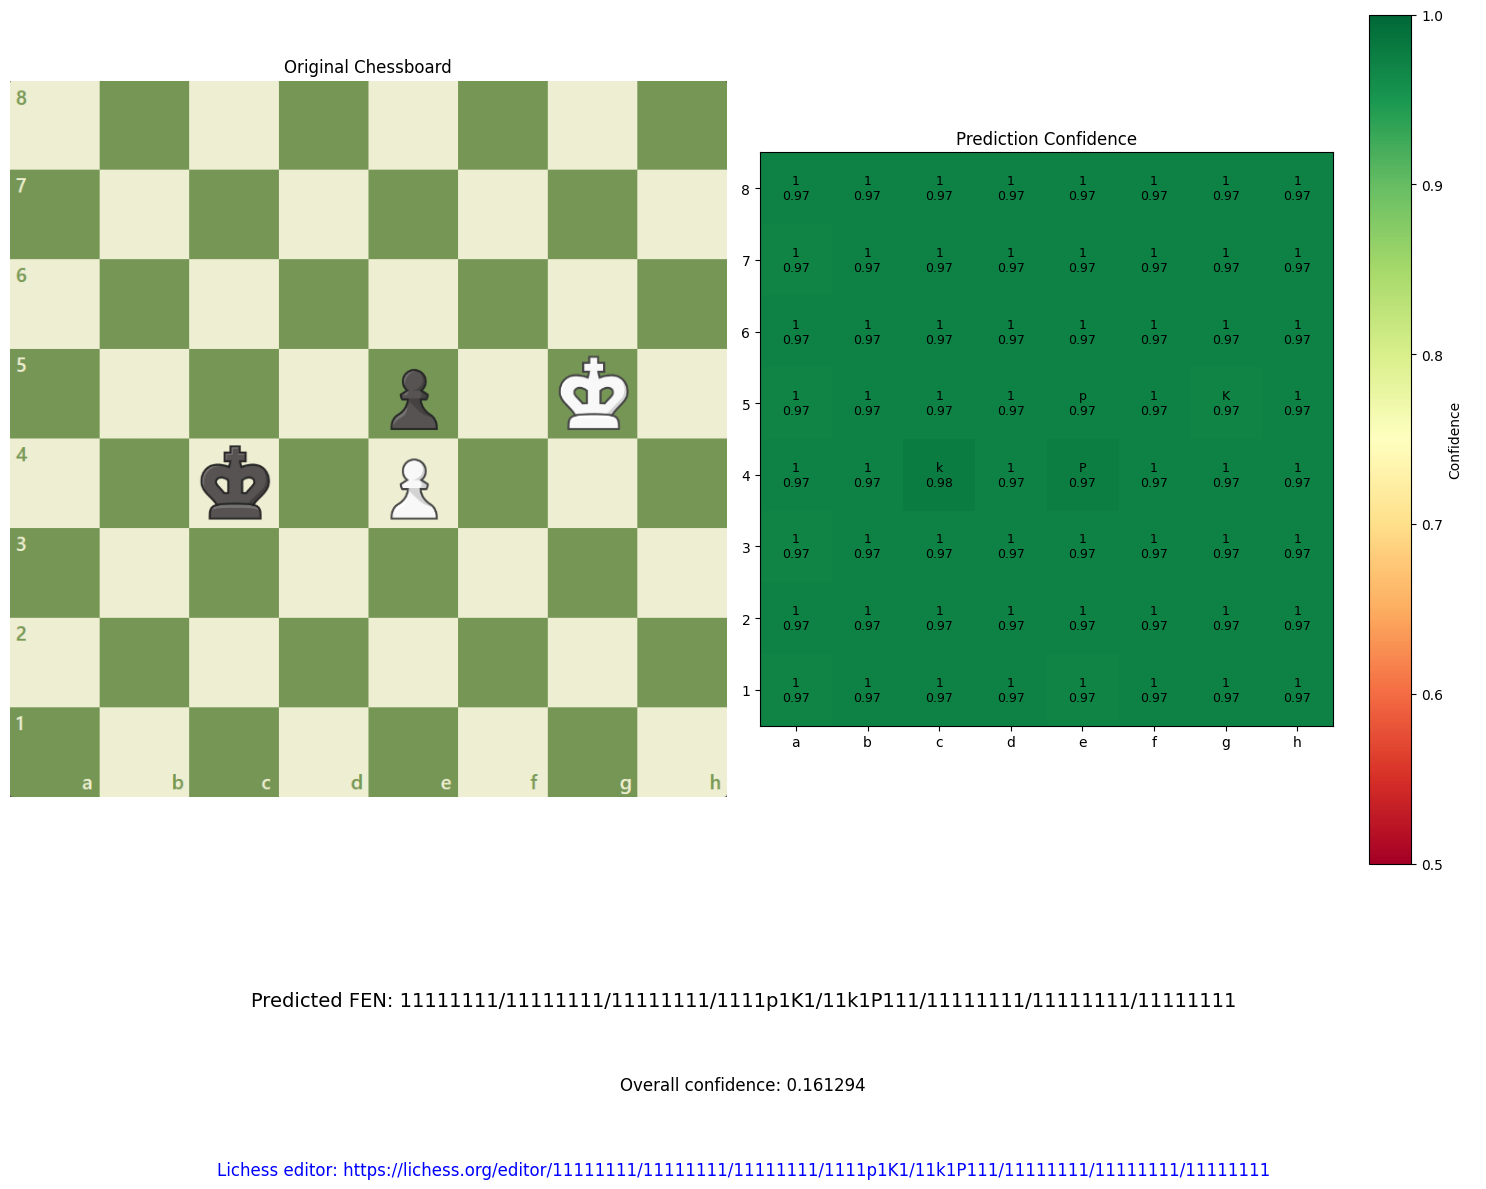

In [11]:
predictor.visualize_prediction(result);